In [1]:
from google.colab import drive
import pandas as pd
import sys
import os

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# get data from drive
df = pd.read_csv(r"/content/drive/MyDrive/AAI510_ML/ai_job_dataset.csv")

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df_as_list = df.columns.tolist()
sorted_df_as_list = sorted(df_as_list)
print(sorted_df_as_list)

['application_deadline', 'benefits_score', 'company_location', 'company_name', 'company_size', 'education_required', 'employee_residence', 'employment_type', 'experience_level', 'industry', 'job_description_length', 'job_id', 'job_title', 'posting_date', 'remote_ratio', 'required_skills', 'salary_currency', 'salary_usd', 'years_experience']


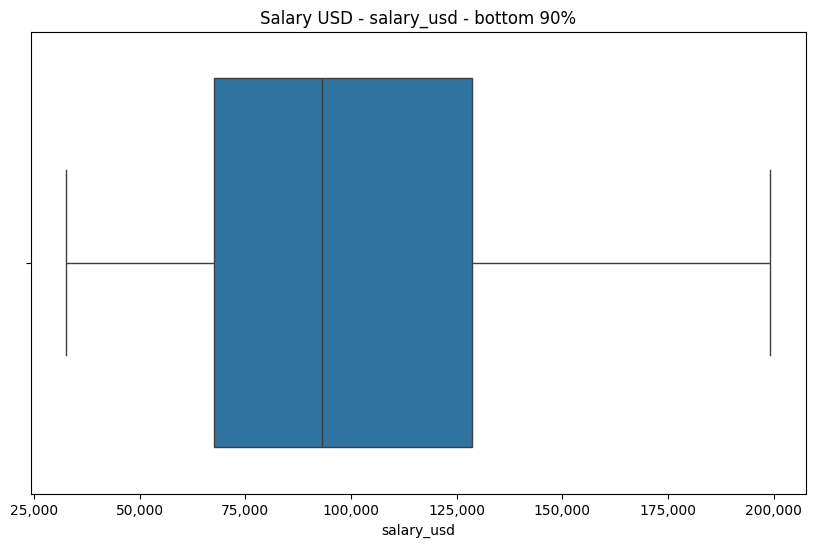

In [7]:
# plot and evaluate top 10 variables
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt #to allow subplot creation

plt.figure(figsize=(10, 6))

upper_limit = df['salary_usd'].quantile(0.90)

sns.boxplot(x=df[df['salary_usd'] <= upper_limit]['salary_usd'])
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html - found to help format the bottom part
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Salary USD - salary_usd - bottom 90%')
plt.show()

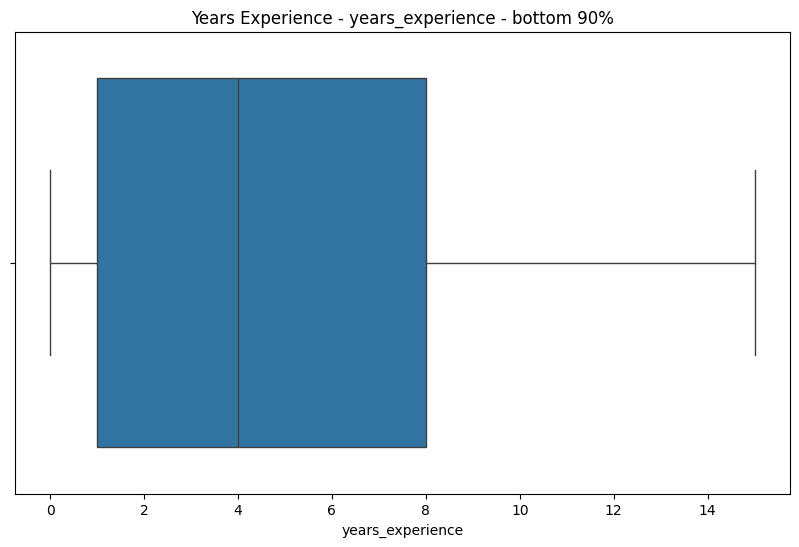

In [8]:
plt.figure(figsize=(10, 6))

upper_limit = df['years_experience'].quantile(0.90)

sns.boxplot(x=df[df['years_experience'] <= upper_limit]['years_experience'])
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html - found to help format the bottom part
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Years Experience - years_experience - bottom 90%')
plt.show()

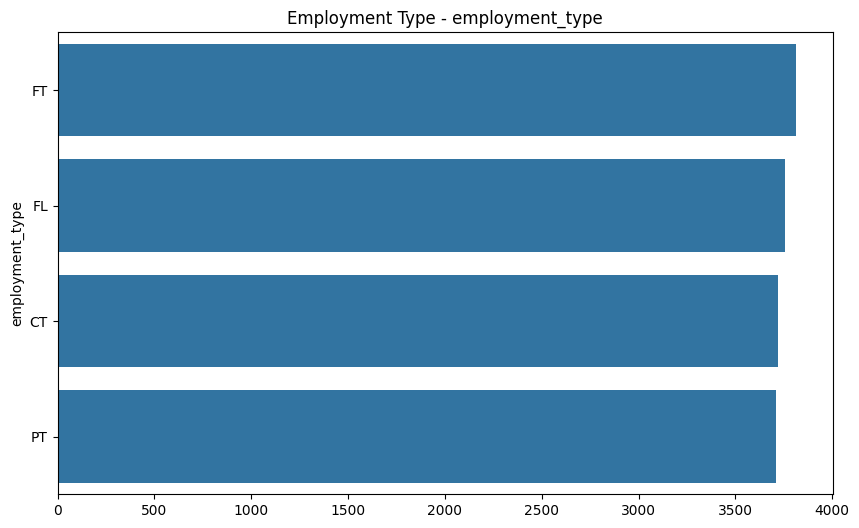

In [9]:
plt.figure(figsize=(10, 6))

category_counts = df['employment_type'].value_counts() # sorted for easier understanding
sns.barplot(y=category_counts.index, x=category_counts.values, order=category_counts.index) # tried countplot but it was kind of messy.

plt.title('Employment Type - employment_type')
plt.show()

# Website says: FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)

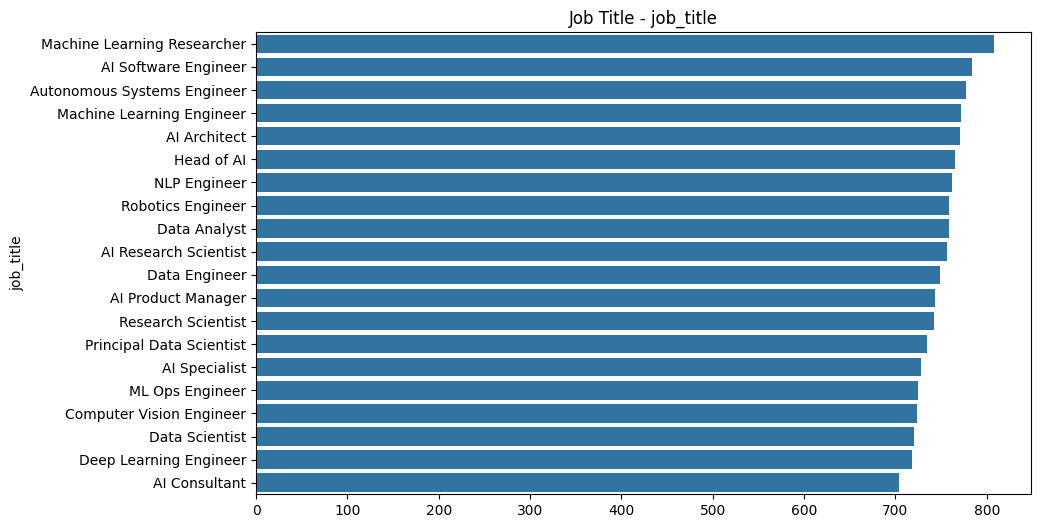

In [10]:
plt.figure(figsize=(10, 6))

category_counts = df['job_title'].value_counts() # sorted for easier understanding
sns.barplot(y=category_counts.index, x=category_counts.values, order=category_counts.index)

plt.title('Job Title - job_title')
plt.show()